## Assignmnet 1 Classification

class 1 vs class 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class1 = np.loadtxt(r"C:\Users\sppat\OneDrive\Desktop\coding_practice\ML_codes\Assignment_1_data\Class1.txt")
class2 = np.loadtxt(r"C:\Users\sppat\OneDrive\Desktop\coding_practice\ML_codes\Assignment_1_data\Class2.txt")
class3 = np.loadtxt(r"C:\Users\sppat\OneDrive\Desktop\coding_practice\ML_codes\Assignment_1_data\Class3.txt")

In [3]:
def binary_data_class_maker(class_A , class_B): # class A  will have label as 1 , unlike class B will have label as 0
    class_A_label = np.insert(class_A , 2,0 , axis= 1)
    class_B_label = np.insert(class_B , 2,1 , axis= 1)
    return class_A_label , class_B_label    

In [4]:
def sigmoidal_function(activation_value): # it will restrict the output from it inbetween 0 to 1.
    f = 1/(1 + np.exp(-activation_value))
    return f


In [5]:
np.random.seed(42)

In [6]:
def predict(input_x , weights , bias):
    p = np.dot(input_x , weights) + bias
    a = sigmoidal_function(p)
    return a


In [ ]:
class_1_with_label  , class_2_with_label = binary_data_class_maker(class1 , class2)


class_1_2_data  = np.concatenate((class_1_with_label  , class_2_with_label), axis= 0)


np.random.shuffle(class_1_2_data)

# Splitting the data

split = int(len(class_1_2_data)*0.7)

train_1_2 = class_1_2_data[ :split]
test_1_2 = class_1_2_data[split : ]

In [ ]:
# weights = np.random.randn(1,2) , this will give 2d array , i want 1d only
# weights.shape

In [ ]:
weights = np.random.randn(2)*0.01 # shape: (2,)
weights

array([-0.00601969,  0.00760251])

Epoch no. 1 | instant loss = 0.2356 | avg_loss = 0.2356
Epoch no. 1 | instant loss = 0.213 | avg_loss = 0.213
Epoch no. 1 | instant loss = 0.1504 | avg_loss = 0.1504
Epoch no. 1 | instant loss = 0.0979 | avg_loss = 0.0979
Epoch no. 1 | instant loss = 0.2579 | avg_loss = 0.2579
Epoch no. 1 | instant loss = 0.0687 | avg_loss = 0.0687
Epoch no. 1 | instant loss = 0.0878 | avg_loss = 0.0878
Epoch no. 1 | instant loss = 0.146 | avg_loss = 0.146
Epoch no. 1 | instant loss = 0.0212 | avg_loss = 0.0212
Epoch no. 1 | instant loss = 0.0935 | avg_loss = 0.0935
Epoch no. 1 | instant loss = 0.054 | avg_loss = 0.054
Epoch no. 1 | instant loss = 0.1456 | avg_loss = 0.1456
Epoch no. 1 | instant loss = 0.0583 | avg_loss = 0.0583
Epoch no. 1 | instant loss = 0.0481 | avg_loss = 0.0481
Epoch no. 1 | instant loss = 0.0123 | avg_loss = 0.0123
Epoch no. 1 | instant loss = 0.0535 | avg_loss = 0.0535
Epoch no. 1 | instant loss = 0.0396 | avg_loss = 0.0396
Epoch no. 1 | instant loss = 0.0127 | avg_loss = 0.012

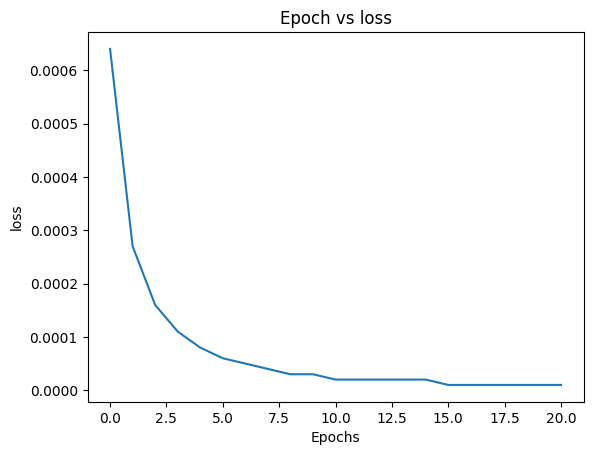

In [ ]:
# training on class 1 v/s class2 



eta = 0.01
Epoches  = 20
Epoch_loss = []

for epoch in range(Epoches+1):
    loss = []

    for i in train_1_2 : # SGD ,becasue it is updating at every step.
        
        a = np.dot(weights.T,i[0:2])
        # print(f"weights are {weights} and input {i[0:2]} --> dot_product is {a}")
    
        y_cap = sigmoidal_function(a)
        y = i[2]
        E = ( y - y_cap)**2  

        loss.append(E)

        avg_loss = np.mean(E)       
        weights = weights + 2*eta*(y-y_cap)*(y_cap)*(1-y_cap)*i[0:2]

        print(f"Epoch no. {epoch+1} | instant loss = {round(E,4)} | avg_loss = {round(avg_loss,4)}")

    Epoch_loss.append(round(avg_loss,5))


epoch_mean_loss  = np.mean(Epoch_loss)




print(f"Total epochs {Epoches} and avg loss after these epochs is {round(epoch_mean_loss,5)} and the method used is SGD")

plt.plot(Epoch_loss)
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Epoch vs loss")
plt.show()
    


In [12]:
# i want to draw the confusion matrix

test_1_2.shape


(300, 3)

In [14]:
tp  = 0
fp = 0
tn = 0
fn = 0

for i in test_1_2:
    prediction = np.dot(weights.T,i[0:2])
    f_a = sigmoidal_function(prediction)

    if  f_a  >= 0.5  and i[2] == 1 :
        tp = tp + 1 
    elif f_a < 0.5  and i[2] == 0 :
        tn = tn + 1
    elif f_a < 0.5 and i[2] == 1 :
        fn = fn + 1 
    elif f_a >= 0.5 and i[2] == 0:
        fp  = fp + 1    
    
print(f'''
__________________________________
        {tp}    |     {fn}
       ________|_________ 
               |
        {fp}      |     {tn}

''')





__________________________________
        159    |     0
       ________|_________ 
               |
        0      |     141




In [15]:

# acuuracy is total number of sampls belonging to class of tp and tn
accuracy = ((tp + tn) /(tp + tn + fp + fn) )  * 100
print(f"accuracy is {int(accuracy)} %")

# precision  is  total no of samples , correctly classified out of total number of samples  
precision = ( tp/(tp + fp) )* 100
print(f"precision is {precision}")

recall = tp /( tp + fn)
print(f"recall is {recall}")

accuracy is 100 %
precision is 100.0
recall is 1.0


In [ ]:
# to plot the curve showing the boundary 
x1_test = []
x2_test = []
label = []
for i in test_1_2:
    x1_test.append(i[0])
    x2_test.append(i[1])
    label.append(i[2])

    

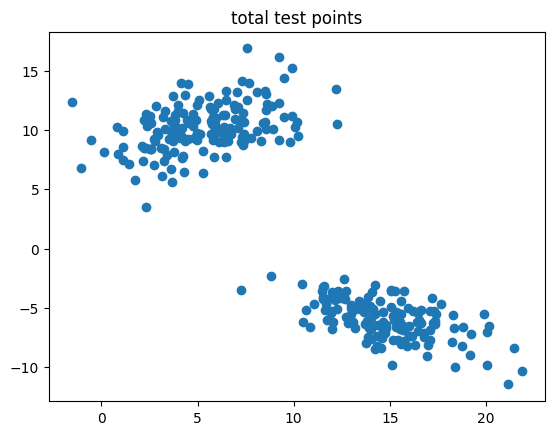

In [ ]:
plt.scatter(x1_test,x2_test)
plt.title("total test points")
plt.show()

# now we have to draw a decsision boundary inbetweeen them .

In [20]:
x_values = np.linspace(np.min(x1_test),np.max(x1_test), 100)
x_values
y_values = -(weights[0]/weights[1])*x_values

y_values

array([-0.41550824, -0.35219054, -0.28887284, -0.22555514, -0.16223743,
       -0.09891973, -0.03560203,  0.02771567,  0.09103338,  0.15435108,
        0.21766878,  0.28098648,  0.34430419,  0.40762189,  0.47093959,
        0.53425729,  0.597575  ,  0.6608927 ,  0.7242104 ,  0.78752811,
        0.85084581,  0.91416351,  0.97748121,  1.04079892,  1.10411662,
        1.16743432,  1.23075202,  1.29406973,  1.35738743,  1.42070513,
        1.48402283,  1.54734054,  1.61065824,  1.67397594,  1.73729364,
        1.80061135,  1.86392905,  1.92724675,  1.99056445,  2.05388216,
        2.11719986,  2.18051756,  2.24383527,  2.30715297,  2.37047067,
        2.43378837,  2.49710608,  2.56042378,  2.62374148,  2.68705918,
        2.75037689,  2.81369459,  2.87701229,  2.94032999,  3.0036477 ,
        3.0669654 ,  3.1302831 ,  3.1936008 ,  3.25691851,  3.32023621,
        3.38355391,  3.44687161,  3.51018932,  3.57350702,  3.63682472,
        3.70014242,  3.76346013,  3.82677783,  3.89009553,  3.95

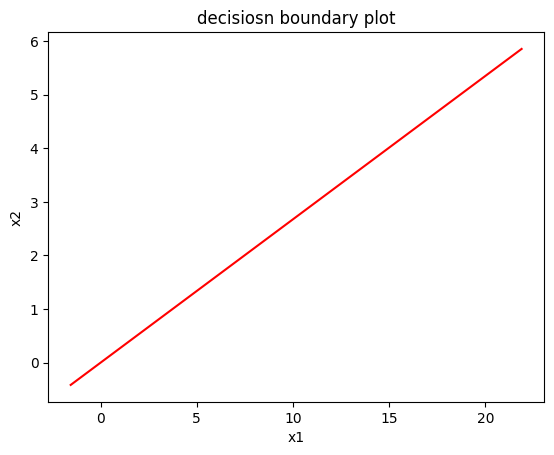

In [22]:
plt.plot(x_values,y_values , color ='r')
plt.title("decisiosn boundary plot")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

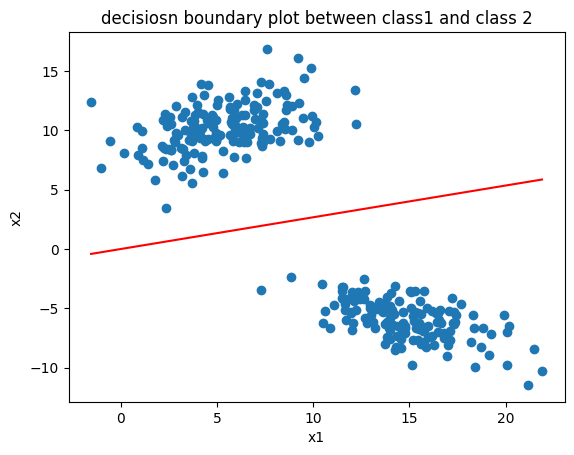

In [24]:
# combining both the graphs

plt.scatter(x1_test,x2_test)
plt.plot(x_values,y_values , color ='r')
plt.title("decisiosn boundary plot between class1 and class 2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()